In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
converting_df = pd.read_csv('MOAtestFile.txt')
converting_df

In [ ]:
converting_df.to_csv("MOAtest")

In [ ]:
pd.read_csv("MOAtest")

In [2]:
example2 = pd.read_csv("Example2tutorial.txt")
example2.head()

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),classified instances,classifications correct (percent),Kappa Statistic (percent),Kappa Temporal Statistic (percent),Kappa M Statistic (percent),model training instances,model serialized size (bytes)
0,1000.0,0.015625,7.308295e-12,1000.0,85.5,62.946305,66.042155,51.342282,1000.0,1808.0
1,2000.0,0.015625,7.308295e-12,2000.0,88.2,70.261497,73.120729,61.437908,2000.0,1808.0
2,3000.0,0.015625,7.308295e-12,3000.0,88.9,70.730009,73.123487,60.638298,3000.0,1808.0
3,4000.0,0.031250,1.461659e-11,4000.0,89.0,72.498900,74.770642,64.743590,4000.0,1808.0
4,5000.0,0.031250,1.461659e-11,5000.0,88.9,69.513870,70.942408,59.636364,5000.0,1808.0


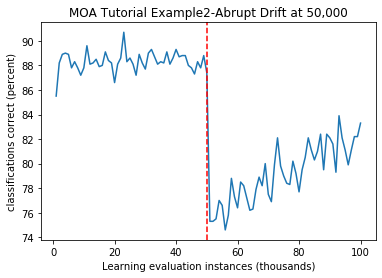

In [8]:
plt.plot(example2['learning evaluation instances']/1000,example2['classifications correct (percent)'])
plt.xlabel('Learning evaluation instances (thousands)')
plt.axvline(x=50, color='r', ls='--')
plt.ylabel('classifications correct (percent)')
plt.title("MOA Tutorial Example2-Abrupt Drift at 50,000")
plt.savefig("MOATutorialExample2.png")

In [9]:
example3_bayes = pd.read_csv('Example3_NaiveBayes.txt')
example3_bayes.head()

,learning evaluation instances,evaluation time (cpu seconds),model cost (RAM-Hours),classified instances,classifications correct (percent),Kappa Statistic (percent),Kappa Temporal Statistic (percent),Kappa M Statistic (percent),model training instances,model serialized size (bytes)
0,1000.0,0.015625,1.749464e-11,1000.0,82.0,54.744760,61.038961,45.783133,1000.0,4328.0
1,2000.0,0.015625,1.749464e-11,2000.0,87.1,69.020173,73.347107,62.931034,2000.0,4328.0
2,3000.0,0.031250,3.498927e-11,3000.0,87.0,67.463559,71.365639,60.365854,3000.0,4328.0
3,4000.0,0.031250,3.498927e-11,4000.0,88.6,70.671771,73.049645,63.461538,4000.0,4328.0
4,5000.0,0.031250,3.498927e-11,5000.0,86.6,66.998325,71.058315,60.355030,5000.0,4328.0


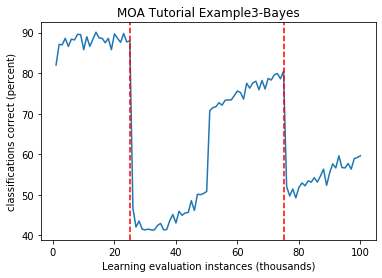

In [19]:
axis_lines = [25, 75]
plt.plot(example3_bayes['learning evaluation instances']/1000,example3_bayes['classifications correct (percent)'])
plt.xlabel('Learning evaluation instances (thousands)')
plt.axvline(x=25, color='r', ls='--')
plt.axvline(x=75, color='r', ls='--')
plt.ylabel('classifications correct (percent)')
plt.title("MOA Tutorial Example3-Bayes")
plt.savefig("MOATutorialExample3-Bayes.png")

KeyError: 'N'

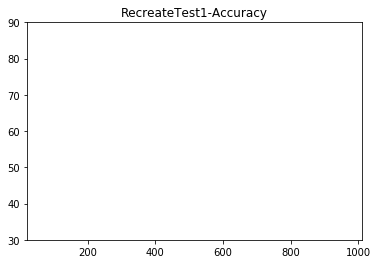

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import types

def plotter(dataset_name,
           y_values,
           loc_legend=4,
           figure_name=None,
           axis=[0,1010,40,100],
           classifiers=["HoeffdingTree"],
           drifts=None,
           gradual_drift=None,
           x_values=[100,200,300,400,500,600,700,800,900,1000],
           xlabel='Number of instances (thousands)',
           ylabel='Accuracy'):
    
    plt.title(dataset_name + '-' + ylabel)
    plt.axis(axis)
    
    line_style= ['-o', '-x', '-p', '-1', '-s', '-v', '-d']
    idx=0
    stream_classifier=[]
    for classifier in classifiers:
        plotted, = plt.plot(x_values, y_values[classifier], line_style[idx % len(line_style)], label=classifier)
        stream_classifier.append(plotted)
        idx+=1
        
    plt.axhline(y=0, xmax=1, color='black', ls='--')
    
    if drifts is not None:
        for drift in drifts:
            if gradual_drift is not None:
                if isinstance(gradual_drift, (list)) is False:
                    plt.axvline(x=drift-gradual_drift, ymax=1, color='g', ls='--')
                    plt.axvline(x=drift+gradual_drift, ymax=1, color='g', ls='--')
                plt.axvline(x=drift, ymax=1, color='y')
                
    if isinstance(gradual_drift, (list)):
        for i in range(0, len(gradual_drift)):
            if gradual_drift[i] >0: 
                plt.axvline(x=drifts[i]-gradual_drift[i], ymax=1, color='g', ls='--')
                plt.axvline(x=drifts[i]+gradual_drift[i], ymax=1, color='g', ls='--')
                
            plt.legend(stream_classifier, classifiers, loc=loc_legend, ncol=2, bbox_to_anchor=(0., 0, 1,0))
            plt.ylabel(ylabel)
            plt.xlabel(xlabel)
            
            if figure_name is None:
                figure_name= 'Testplot.png'
                
            plt.savefig(f"visualizations/{figure_name}")
            plt.show()
if __name__=="__main__":
    
    test1xvalues= {0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000}
    test1yvalues= {'NaiveBayes': example3_bayes['classifications correct (percent)']}
    
    plotter(dataset_name='RecreateTest1',
           y_values=test1yvalues,
           axis=[20,1010, 30, 90],
           classifiers='NaiveBayes',
           drifts=[50],
           gradual_drift=None,
           ylabel='Accuracy',
           xlabel='# of instances (thousands)')

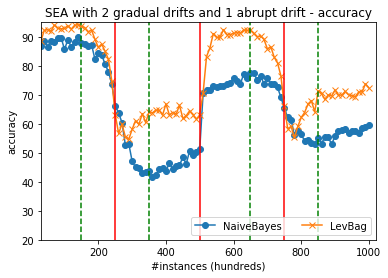

In [27]:
import matplotlib.pyplot as plt
import types

def plotline(dataset_name,
              yvalues,
              loc_legend=4,
              figure_name=None,
              axis=[0, 1010, 40, 100],
              classifiers=['HoeffdingTree'],
              drifts=None,
              gradual_drift=None,
              xvalues=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
              xlabel='# instances (thousands)',
              ylabel='accuracy'):

    plt.title(dataset_name + ' - ' + ylabel)
    plt.axis(axis)

    line_style = ['-o', '-x', '-p', '-1', '-s', '-v', '-d']
    idx = 0
    stream_classifier = []
    for classifier in classifiers:
        plotted, = plt.plot(xvalues, yvalues[classifier], line_style[idx % len(line_style)], label=classifier)
        stream_classifier.append(plotted)
        idx+=1

    plt.axhline(y=0, xmax=1, color='black', ls='--')

    if drifts is not None:
        for drift in drifts:
            if gradual_drift is not None:
                if isinstance(gradual_drift, (int, float, str, list, tuple)) is False:
                    plt.axvline(x=drift-gradual_drift, ymax=1, color='r', ls='--')
                    plt.axvline(x=drift+gradual_drift, ymax=1, color='r', ls='--')
            plt.axvline(x=drift, ymax=1, color='r')

    if isinstance(gradual_drift, (int, float, str, list, tuple)):
        for i in range(0,len(gradual_drift)):
            if gradual_drift[i] > 0:
                plt.axvline(x=drifts[i]-gradual_drift[i], ymax=1, color='g', ls='--')
                plt.axvline(x=drifts[i]+gradual_drift[i], ymax=1, color='g', ls='--')

    plt.legend(stream_classifier, classifiers, loc=loc_legend, ncol=2, bbox_to_anchor=(0., 0, 1, 0))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    if figure_name is None:
        figure_name = 'Unnamedplot.png'

    plt.savefig(figure_name)
    plt.show()


if __name__ == "__main__":
    

    example4_yvalues = {'NaiveBayes': [82,87.1,87,88.4,86.6,88.5,88.2,89.6,89.7,85.7,89,86.5,88.3,89.8,87.9,87.4,86.7,87.3,82.3,84.3,83.7,80.6,77.9,73.7,66.2,63.8,60.4,52.7,53.2,47.1,45,44.8,42.9,43.3,43.6,41.5,42.5,44.3,44.7,43.7,46.5,44.5,45.4,45.8,48.4,46.2,50.7,49.4,50.3,51.4,70.7,71.5,71.8,73.1,72.6,72.9,73.2,73.8,74.1,75.7,74.9,73.8,77.2,75.8,77.7,77.4,75,76.6,73.6,75.7,73.9,73.8,72.6,69.1,65.5,62.2,61.4,56.1,57.7,56.4,54.1,54.4,53.3,53.2,55.1,53.2,55.5,55.3,52.9,55.9,57.5,57.8,58.1,56.7,57.6,57.4,56.8,58.6,59,59.7],
                    'LevBag':[78.1,85.2,88.4,92.2,92.5,91.9,94.1,93,92.8,92.9,93.8,92.7,94,94.2,93.6,93.2,91.7,92.4,89.1,86.4,87.5,85,82.2,74.7,63.2,56.7,59.9,55.5,54.7,58.1,61.1,59.8,63.5,60.5,64,63.8,64.7,64.7,63,66.9,63.1,63.9,63.3,66.4,61.9,62.8,64.5,63.2,61.6,63.1,70.8,83.2,86.2,91.1,89.8,89.8,92.5,90.8,90.8,91.2,91.5,91.3,92.4,92.2,92.3,91.2,90,90.3,89.1,85.8,86.6,83,81,76.5,66.2,58.3,59.1,55.3,59.1,62.2,63.9,66.8,68,64.1,71.4,70.5,68.4,70,69.6,71.7,69.9,69.9,71.2,70,69.7,69.4,71,71,73.8,72.4]}
    example4_xvalues = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000]

    plotline(dataset_name='SEA with 2 gradual drifts and 1 abrupt drift',
            yvalues=example4_yvalues,
            axis=[30, 1020, 20, 95],
            classifiers=['NaiveBayes', 'LevBag'],
            xvalues=example4_xvalues,
            # figure_name='SEA2gradual1abrupt.pdf',
            drifts=[250,500,750],
            gradual_drift=[100,0,100],
            ylabel='accuracy',
            xlabel='#instances (hundreds)')
    
    
    

In [ ]:
example3_leverage = pd.read_csv('Example3_LeveragingBag.txt')
example3_leverage.head()

In [ ]:
plt.plot(example3_leverage['learning evaluation instances'],example3_leverage['classifications correct (percent)'])
plt.xlabel('Learning evaluation instances')
plt.ylabel('classifications correct (percent)')
plt.title("MOA Tutorial Example3-LeveragingBag")
plt.savefig("MOATutorialExample3-LeveragingBag.png")

In [ ]:
line1 = plt.plot(example3_bayes['learning evaluation instances'],example3_bayes['classifications correct (percent)'])
line2 = plt.plot(example3_leverage['learning evaluation instances'],example3_leverage['classifications correct (percent)'])
labels = ['Bayes', 'LeveragingBag']
plt.title("Example3-Accuracy of Mixed and Multiple Drifts")
plt.xlabel('Learning evaluation instances')
plt.ylabel('classifications correct (percent)')
plt.legend(labels, loc='best')
plt.savefig("MOATutorialExample3-Both")

In [ ]:
example4_bayes = pd.read_csv('Example4_NaiveBayes.txt')
example4_bayes.head()

In [ ]:
example4_leverage = pd.read_csv('Example4_LeveragingBag.txt')
example4_leverage.head()

In [ ]:
labels = ["Naive Bayes", "Leveraging Bag"]
plt.plot(example4_bayes["learning evaluation instances"], example4_bayes["classifications correct (percent)"])
plt.plot(example4_leverage["learning evaluation instances"], example4_leverage["classifications correct (percent)"])
plt.xlabel("Learning Evaluation Instances")
plt.ylabel("Classifications Correct (percent)")
plt.title("Accuracy of Gradual and Mixed Drifts")
plt.legend(labels, loc='best')
plt.savefig("visualizations/Example4_gradualDrift")
plt.show()

In [ ]:
example5 = pd.read_csv("Example5_IncrementalDriftsbayes.txt")
example5.head()

In [ ]:
plt.plot(example5["learning evaluation instances"], example5["classifications correct (percent)"])
plt.title("Accuracy of Incremental Drifts (Naive Bayes)")
plt.xlabel("Learning Evaluation Instances")
plt.ylabel("Classification Correct (percent)")
plt.savefig('visualizations/Example5_incrementalDrift')
plt.show()

In [ ]:
example6 = pd.read_csv("Example6_SubtleIncrementalDrifts.txt")
example6.head()

In [ ]:
plt.plot(example6["learning evaluation instances"], example6["classifications correct (percent)"])
plt.title("Accuracy of Subtle Incremental Drifts (Naive Bayes)")
plt.xlabel("Learning Evaluation Instances")
plt.ylabel("Classification Correct (percent)")
plt.savefig('visualizations/Example6_subtleincrementalDrift')
plt.show()

In [ ]:
labels=["Not Subtle", "Subtle"]
plt.plot(example5["learning evaluation instances"], example5["classifications correct (percent)"])
plt.plot(example6["learning evaluation instances"], example6["classifications correct (percent)"])
plt.title("Example 5 vs. Example 6 Accuracy")
plt.xlabel("Learning Evaluation Instances")
plt.ylabel("Classification Correct (percent)")
plt.legend(labels, loc = 'best')
plt.savefig('visualizations/Example5vExample6.png')
plt.show()

In [ ]:
exercise1 = pd.read_csv("Exercises/exercise1.txt")
exercise1

In [ ]:
plt.plot(exercise1["learning evaluation instances"], exercise1["classifications correct (percent)"])
plt.title("Exercise 1-Drift at 50,000th Instance")
plt.xlabel("Learning Evaluation Instances")
plt.ylabel("Accuracy")
plt.savefig('visualizations/Exercise1.png')
plt.show()

In [ ]:
exercise2 = pd.read_csv("Exercises/exercise2.txt")
exercise2.head()

In [ ]:
yvalues_charts = exercise2["classifications correct (percent)"]/1000
xvalues_charts= exercise2["learning evaluation instances"]/1000

In [ ]:
plt.plot(xvalues_charts, exercise2["classifications correct (percent)"])
plt.title("Exercise 2- Simulating Multiple Different Drifts")
plt.xlabel("Learning Evaluation Instances(thousands)")
# plt.axvline(x=500, color='r', ls="--")
plt.ylabel("Accuracy (Percent)")
plt.savefig('visualizations/Exercise2.png')
plt.show()

In [ ]:
exercise3 = pd.read_csv("Exercises/exercise3.txt")
exercise3.head()

In [ ]:
plt.plot(exercise3["learning evaluation instances"], exercise3["classifications correct (percent)"])
plt.title("Exercise 3- Simulating Three Abrupt Drifts")
plt.xlabel("Learning Evaluation Instances")
plt.axvline()
plt.ylabel("Accuracy")
plt.savefig('visualizations/Exercise3.png')
plt.show()

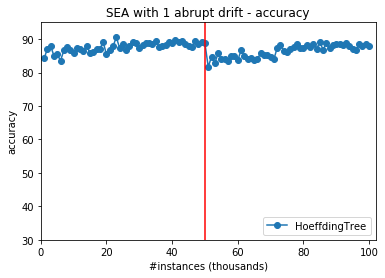

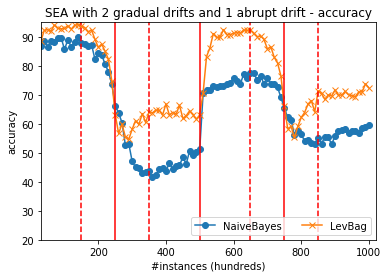

In [20]:
import matplotlib.pyplot as plt
import types

def plotline(dataset_name,
              yvalues,
              loc_legend=4,
              figure_name=None,
              axis=[0, 1010, 40, 100],
              classifiers=['HoeffdingTree'],
              drifts=None,
              gradual_drift=None,
              xvalues=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
              xlabel='# instances (thousands)',
              ylabel='accuracy'):

    plt.title(dataset_name + ' - ' + ylabel)
    plt.axis(axis)

    line_style = ['-o', '-x', '-p', '-1', '-s', '-v', '-d']
    idx = 0
    stream_classifier = []
    for classifier in classifiers:
        plotted, = plt.plot(xvalues, yvalues[classifier], line_style[idx % len(line_style)], label=classifier)
        stream_classifier.append(plotted)
        idx+=1

    plt.axhline(y=0, xmax=1, color='black', ls='--')

    if drifts is not None:
        for drift in drifts:
            if gradual_drift is not None:
                if isinstance(gradual_drift, (int, float, str, list, tuple)) is False:
                    plt.axvline(x=drift-gradual_drift, ymax=1, color='r', ls='--')
                    plt.axvline(x=drift+gradual_drift, ymax=1, color='r', ls='--')
            plt.axvline(x=drift, ymax=1, color='r')

    if isinstance(gradual_drift, (int, float, str, list, tuple)):
        for i in range(0,len(gradual_drift)):
            if gradual_drift[i] > 0:
                plt.axvline(x=drifts[i]-gradual_drift[i], ymax=1, color='r', ls='--')
                plt.axvline(x=drifts[i]+gradual_drift[i], ymax=1, color='r', ls='--')

    plt.legend(stream_classifier, classifiers, loc=loc_legend, ncol=2, bbox_to_anchor=(0., 0, 1, 0))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    if figure_name is None:
        figure_name = 'Unnamedplot.png'

    plt.savefig(figure_name)
    plt.show()


if __name__ == "__main__":
    ex1abrupt_yvalues = {'HoeffdingTree': [84.2,87.1,87.9,85,85.5,83.5,86.6,87.6,86.7,85.7,87.3,86.9,86.4,88,85.7,86.2,87,87.1,89.1,85.4,86.7,87.9,90.5,87.4,88.6,86.8,87.9,89.2,88.8,87.4,88.2,88.9,88.7,88.6,89.5,87.5,87.8,88.3,89.1,88.9,89.6,89.1,89.3,88.5,87.9,87.7,89.5,88.4,89.2,88.7,81.7,84.7,82.8,85.7,84.1,84,83.3,85,84.9,83.7,86.6,84.9,84,84.3,83.8,84,85.9,85.1,85.3,84.5,83.9,87.4,88.3,86.5,86.1,86.9,87.5,88.6,87.2,87.3,88.3,87.6,88.5,87.1,89.1,86.8,88.9,87.2,88.1,88.4,88.4,88.1,88.7,88,87,86.8,88.5,87.8,88.4,88]}
    ex1abrupt_xvalues = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100]

    plotline(dataset_name='SEA with 1 abrupt drift',
                yvalues=ex1abrupt_yvalues,
                axis=[0, 102, 30, 95],
                classifiers=['HoeffdingTree'],
                xvalues=ex1abrupt_xvalues,
                figure_name='SEA1abrupt.png',
                drifts=[50],
                gradual_drift=None,
                ylabel='accuracy',
                xlabel='#instances (thousands)')
    

    example4_yvalues = {'NaiveBayes': [82,87.1,87,88.4,86.6,88.5,88.2,89.6,89.7,85.7,89,86.5,88.3,89.8,87.9,87.4,86.7,87.3,82.3,84.3,83.7,80.6,77.9,73.7,66.2,63.8,60.4,52.7,53.2,47.1,45,44.8,42.9,43.3,43.6,41.5,42.5,44.3,44.7,43.7,46.5,44.5,45.4,45.8,48.4,46.2,50.7,49.4,50.3,51.4,70.7,71.5,71.8,73.1,72.6,72.9,73.2,73.8,74.1,75.7,74.9,73.8,77.2,75.8,77.7,77.4,75,76.6,73.6,75.7,73.9,73.8,72.6,69.1,65.5,62.2,61.4,56.1,57.7,56.4,54.1,54.4,53.3,53.2,55.1,53.2,55.5,55.3,52.9,55.9,57.5,57.8,58.1,56.7,57.6,57.4,56.8,58.6,59,59.7],
                    'LevBag':[78.1,85.2,88.4,92.2,92.5,91.9,94.1,93,92.8,92.9,93.8,92.7,94,94.2,93.6,93.2,91.7,92.4,89.1,86.4,87.5,85,82.2,74.7,63.2,56.7,59.9,55.5,54.7,58.1,61.1,59.8,63.5,60.5,64,63.8,64.7,64.7,63,66.9,63.1,63.9,63.3,66.4,61.9,62.8,64.5,63.2,61.6,63.1,70.8,83.2,86.2,91.1,89.8,89.8,92.5,90.8,90.8,91.2,91.5,91.3,92.4,92.2,92.3,91.2,90,90.3,89.1,85.8,86.6,83,81,76.5,66.2,58.3,59.1,55.3,59.1,62.2,63.9,66.8,68,64.1,71.4,70.5,68.4,70,69.6,71.7,69.9,69.9,71.2,70,69.7,69.4,71,71,73.8,72.4]}
    example4_xvalues = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000]

    plotline(dataset_name='SEA with 2 gradual drifts and 1 abrupt drift',
            yvalues=example4_yvalues,
            axis=[30, 1020, 20, 95],
            classifiers=['NaiveBayes', 'LevBag'],
            xvalues=example4_xvalues,
            # figure_name='SEA2gradual1abrupt.pdf',
            drifts=[250,500,750],
            gradual_drift=[100,0,100],
            ylabel='accuracy',
            xlabel='#instances (hundreds)')
    
    
    